# Introduction
This Jupyter notebook presents an approach to predicting house prices using a variety of machine learning models. The workflow is systematically divided into several key stages:

## Data Wrangling
1. Preparing the dataset <br>
The initial step involves loading the dataset and preparing it for analysis.

2. Data Cleaning and Feature Engineering <br>
This includes handling missing values and ensuring the dataset is consistent and free of errors.
New features are created, and existing features are transformed to improve the model's performance.

4. Data Visualization <br>
Visual techniques are employed to understand the underlying patterns and distributions in the data.

5. Descriptive Statistics <br>
Statistical measures and visualizations are used to summarize and describe the main features of the dataset.


## Machine Learning Models
1. **Data Preparation**: The 'Squaremeter price' column is removed as it is not needed for model training. <br> **Missing Values**: Missing values in numerical columns are filled with the mean value. <br> **Label Encoding**: Ordinal features such as 'Risk of burglary', 'Energy class', and 'Type' are encoded using Label Encoding. <br> **One-Hot Encoding**: Nominal features such as 'Zipcode' are encoded using One-Hot Encoding. <br>


2. Feature and Target Variable Definition: The features are defined by excluding columns such as 'Address' and 'Price', while the target variable is set as 'Price'.

3. Numerical Preprocessing: Numerical columns undergo scaling using a StandardScaler within a preprocessing pipeline.

4. Model Initialization and Hyperparameter Tuning: Several machine learning models are initialized, including Linear Regression, Ridge, Lasso, Decision Tree, Random Forest, and Gradient Boosting. Hyperparameter tuning is performed using GridSearchCV for selected models.

5. Data Splitting: The dataset is split into training and testing sets to evaluate model performance.

6. Model Training and Evaluation: Each model is trained on the training data and evaluated on the testing data. Key performance metrics such as Mean Absolute Error (MAE), Mean Squared Error (MSE), and R-squared are calculated for each model.

7. Model Ensemble: An ensemble model using a Voting Regressor is created, combining the predictions from the best-performing models to enhance predictive accuracy.

## Preparing dataset
We have house data for different cities in Zealand, Denmark. In this section, we will prepare the dataset, including data wrangling and exploration. The dataset consists of multiple CSV files, each representing house data for a specific zipcode. We will combine these files into a single dataframe named **housing**. To get an initial look at the dataset and verify its contents, we can use the head() function to display the first few rows.

In [1]:
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

In [2]:
zipcodes = [2100,2620,2740,2750,2760,2950,2960,2970,2980,2990,3000,3050,3060,3070,3080,3100,3120,3140,3150,3200,3210,3220,3230,3250,3320,3480,3490,2300,2400,2450,2500,2600,2610,2630,2640,2650,2690,2700,2720,2765,2770,2791,2800,2820,2830,2840,2850,2860,2870,2880,2900,2920,2930,2942,3300,3310,3360,3370,3400,3450,3460,3540,3550,3600,3650,3660,3670,4000]
dataframes = []

for zipcode in zipcodes:
    filename = f'../data/house_data/house_data_{zipcode}.csv'
    df = pd.read_csv(filename)
    df['Zipcode'] = str(zipcode)
    dataframes.append(df)

housing = pd.concat(dataframes, ignore_index=True)
housing = housing.rename(columns={'X': 'Longitude'})
housing = housing.rename(columns={'Y': 'Latitude'})
housing = housing.drop(columns=["Url"])
housing.head()

,Address,Longitude,Latitude,Price,Type,Room count,Construction year,Risk of burglary,Distance to pharmacy,Distance to daycare,Distance to grocery store,Size,Squaremeter price,Energy class,Zipcode
0,"Nygårdsvej 41A, 2. tv",55.711602,12.570685,3895000,Ejerlejlighed,3,1969,lav,480,141,78.0,76,51250,C,2100
1,"Strandboulevarden 101, 2. th",55.707667,12.585303,6495000,Ejerlejlighed,4,NaN,lav,554,148,134.0,101,64306,C,2100
2,"Kildevældsgade 64, 4.",55.714347,12.571365,8495000,Ejerlejlighed,4,1907,lav,666,79,260.0,138,61557,C,2100
3,"Rosenvængets Hovedvej 48, st. 4",55.701222,12.587771,6195000,Ejerlejlighed,3,NaN,lav,638,124,249.0,88,70397,B,2100
4,H.C. Lumbyes Gade 39,55.714634,12.572670,13495000,Rækkehus,6,1902,lav,652,136,298.0,149,90570,C,2100


Similarly, to see the last few entries in the dataset, we use the tail() function.

In [3]:
housing.tail()

,Address,Longitude,Latitude,Price,Type,Room count,Construction year,Risk of burglary,Distance to pharmacy,Distance to daycare,Distance to grocery store,Size,Squaremeter price,Energy class,Zipcode
7086,"Himmelev Have 3, st. 1",55.654501,12.102008,4295000,Ejerlejlighed,3,NaN,lav,"1,38",457,481.000,94,45691,A2010,4000
7087,Gevninge Bygade 43C,55.646939,11.960943,1395000,Ejerlejlighed,2,NaN,mellem,"6,02",260,612.000,78,17884,C,4000
7088,"Roskildevænget 24, 2. tv",55.627390,12.093665,2195000,Ejerlejlighed,3,1962,høj,"1,29",124,142.000,71,30915,C,4000
7089,"Algade 38, 2. tv",55.640782,12.087549,6250000,Ejerlejlighed,5,NaN,lav,95,455,101.000,147,42517,C,4000
7090,Fasanengen 5,55.693822,12.143911,6195000,Villa,6,2022,mellem,"5,06",521,1.018,179,34608,A2020,4000


To understand the distribution of the numerical data, we use the describe() function. This function provides summary statistics such as mean, standard deviation, min, max, and quartiles.

In [4]:
housing.describe()

,Longitude,Latitude,Price,Distance to daycare,Distance to grocery store,Size,Squaremeter price
count,7019.000000,7019.000000,7.091000e+03,7091.000000,7091.000000,7091.000000,7091.000000
mean,55.810862,12.402706,5.905909e+06,628.887886,315.304737,130.577493,43678.158370
std,0.156828,0.194659,6.119488e+06,714.603072,292.382123,75.664871,22640.794781
min,55.182104,9.080482,1.000000e+02,0.000000,1.000000,14.000000,1.000000
25%,55.668324,12.280847,2.848000e+06,218.000000,3.423000,83.000000,29088.000000
50%,55.767180,12.468397,4.398000e+06,377.000000,261.000000,119.000000,38571.000000
75%,55.937120,12.544942,6.895000e+06,686.500000,522.000000,160.000000,52951.000000
max,57.235624,12.674236,1.200000e+08,4459.000000,999.000000,1952.000000,284745.000000


We observe some things:
- there are some missing values for the longitude and latitudes
- the mean (avg) house price is approx. 5.9 million
- the standard deviation for the house price is 6119488, indicating substantial variation in house prices
- the minimum price is 100, which likely indicates an outlier or an error in the dataset.
- for price, 25% of the houses have prices below 2848000
- the medan price is 4398000 meaning half of the houses are priced below this amount and half above
- for price, 75% of the houses have prices below 6895000
- the maximum price is 120 million, indicating the highest priced house in the dataset. Pretty wild. We'll check this out.

<br>

- **Price**: The house prices range significantly, from a minimum of 100 to a maximum of 120 million, with a high standard deviation. This indicates a wide disparity in house prices, likely due to location, size, and other factors.
- **Distance to daycare and grocery store**: The distances vary widely, with some houses located very close (0 meters) to these amenities and others up to 4,459 meters from a daycare and 999 meters from a grocery store.
- **Size**: The size of the houses also varies considerably, from 14 square meters to 1,952 square meters, reflecting a diverse range of property types.

To get detailed information about the dataframe, including the number of non-null entries and data types for each column, we use the info() function.

In [5]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7091 entries, 0 to 7090
Data columns (total 15 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Address                    7091 non-null   object 
 1   Longitude                  7019 non-null   float64
 2   Latitude                   7019 non-null   float64
 3   Price                      7091 non-null   int64  
 4   Type                       7091 non-null   object 
 5   Room count                 7091 non-null   object 
 6   Construction year          5500 non-null   object 
 7   Risk of burglary           6853 non-null   object 
 8   Distance to pharmacy       7091 non-null   object 
 9   Distance to daycare        7091 non-null   int64  
 10  Distance to grocery store  7091 non-null   float64
 11  Size                       7091 non-null   int64  
 12  Squaremeter price          7091 non-null   int64  
 13  Energy class               5697 non-null   objec

In [6]:
housing.isnull().sum()

Address                         0
Longitude                      72
Latitude                       72
Price                           0
Type                            0
Room count                      0
Construction year            1591
Risk of burglary              238
Distance to pharmacy            0
Distance to daycare             0
Distance to grocery store       0
Size                            0
Squaremeter price               0
Energy class                 1394
Zipcode                         0
dtype: int64

### Handling missing values
Upon examining the dataset, we identified several columns with missing values that need to be addressed to ensure the integrity and accuracy of our analysis.
Here we see that in our data we have 72 houses without **Longitude** and **Latitude**. For these we simply chose to remove them, since these labels are of high importance and it isn't a significant number, and also not for a specific city.

We also see that 1591 of 7000+ houses have missing **Construction year** and some even have wrongly inputed years. These do have importance and we don't want to scrap the whole house for this reason. What we will do is find the average construction year for the city and add it to the missing field.

We also see that 238 have missing **Risk of burglary** values. We will do the same as mentioned above, finding the average and inserting it.

Also 1394 **Energy class**es are missing. We will do the same as well for these values.

### Longitude and Latitude
There are 72 houses without Longitude and Latitude values. Given the high importance of geographical coordinates for our analysis and the relatively small number of missing values, we decided to remove these entries from the dataset.

In [7]:
# Removing rows with missing Longitude and Latitude values
housing = housing.dropna(subset=['Longitude', 'Latitude'])

since they are quite spread out and not all in a single city we remove them all from the housing.

In [8]:
housing.shape

(7019, 15)

### Construction year
There are 1,591 houses with missing Construction year values, and some entries have incorrectly inputted years. Instead of discarding these entries, which would result in significant data loss, we will impute the missing values. We will calculate the average construction year for each city and use this average to fill in the missing value

In [9]:
# Converting Construction year to numeric, coercing errors
housing['Construction year'] = pd.to_numeric(housing['Construction year'], errors='coerce')

# Handling missing Construction year values by imputing the average construction year for each city
housing['Construction year'] = housing.groupby('Zipcode')['Construction year'].transform(lambda x: x.fillna(x.mean()))

### Risk of burglary
There are 238 houses with missing Risk of burglary values. We will calculate risk of burglary's mode for each city and use this average to fill in the missing values.

In [10]:
# Calculate the mode (most frequent value) for each zipcode
mode_risk_by_zipcode = housing.groupby('Zipcode')['Risk of burglary'].agg(lambda x: x.mode()[0] if not x.mode().empty else None)

# Method to fill missing risk of burglary with the mode for the zipcode
def fill_missing_risk(row):
    if pd.isnull(row['Risk of burglary']):
        return mode_risk_by_zipcode[row['Zipcode']]
    else:
        return row['Risk of burglary']

# filling missing values
housing['Risk of burglary'] = housing.apply(fill_missing_risk, axis=1)

# Verifying that all missing values have been filled
print("Number of missing 'Risk of burglary' values:", housing['Risk of burglary'].isnull().sum())

Number of missing 'Risk of burglary' values: 0


In [11]:
# Verifying the unique values
unique_burglary_risks = housing['Risk of burglary'].unique()
unique_burglary_risks

array(['lav', 'mellem', 'meget lav', 'høj', 'meget høj'], dtype=object)

### Energy class
There are 1,394 houses with missing Energy class values. We will impute the missing values by calculating energy class' mode for each city and using it for the missing entries.

In [12]:
# Calculating the mode (most frequent value) for each zipcode
mode_energy_class_by_zipcode = housing.groupby('Zipcode')['Energy class'].agg(lambda x: x.mode()[0] if not x.mode().empty else None)
mode_energy_class_by_zipcode

Zipcode
2100    C
2300    C
2400    D
2450    C
2500    D
       ..
3600    C
3650    C
3660    C
3670    D
4000    C
Name: Energy class, Length: 68, dtype: object

In [13]:
# Method to fill missing energy class with the mode for the zipcode
def fill_missing_energy_class(row):
    if pd.isnull(row['Energy class']):
        return mode_energy_class_by_zipcode[row['Zipcode']]
    else:
        return row['Energy class']

housing['Energy class'] = housing.apply(fill_missing_energy_class, axis=1)

# checking the result - if 0 is printed all missing values are filled
print(housing['Energy class'].isnull().sum())

0


In [14]:
housing.isnull().sum()

Address                      0
Longitude                    0
Latitude                     0
Price                        0
Type                         0
Room count                   0
Construction year            0
Risk of burglary             0
Distance to pharmacy         0
Distance to daycare          0
Distance to grocery store    0
Size                         0
Squaremeter price            0
Energy class                 0
Zipcode                      0
dtype: int64

In [15]:
housing.shape

(7019, 15)

This indicates that the dataset contains 7019 rows and 15 columns.

In [16]:
housing.columns

Index(['Address', 'Longitude', 'Latitude', 'Price', 'Type', 'Room count',
       'Construction year', 'Risk of burglary', 'Distance to pharmacy',
       'Distance to daycare', 'Distance to grocery store', 'Size',
       'Squaremeter price', 'Energy class', 'Zipcode'],
      dtype='object')

In [17]:
housing["Type"].unique()

array(['Ejerlejlighed', 'Rækkehus', 'Villalejlighed', 'Andelsbolig',
       'Villa', 'Helårsgrund', 'Fritidshus', 'Landejendom'], dtype=object)

In [18]:
housing.count()

Address                      7019
Longitude                    7019
Latitude                     7019
Price                        7019
Type                         7019
Room count                   7019
Construction year            7019
Risk of burglary             7019
Distance to pharmacy         7019
Distance to daycare          7019
Distance to grocery store    7019
Size                         7019
Squaremeter price            7019
Energy class                 7019
Zipcode                      7019
dtype: int64

Very nice. Now we see that we have 0 null values and a total of 7019 records with 15 columns.

In [19]:
housing["Type"].value_counts()

Type
Villa             3201
Ejerlejlighed     1993
Fritidshus         812
Rækkehus           715
Villalejlighed     151
Landejendom         82
Andelsbolig         53
Helårsgrund         12
Name: count, dtype: int64

Given the small number of certain property types, we will remove these from the dataset to focus on the more prevalent property types.

In [20]:
values_to_remove = ['Landejendom', 'Andelsbolig', 'Helårsgrund']

housing = housing[~housing["Type"].isin(values_to_remove)]

In [21]:
housing['Type'].value_counts()

Type
Villa             3201
Ejerlejlighed     1993
Fritidshus         812
Rækkehus           715
Villalejlighed     151
Name: count, dtype: int64

In [22]:
housing["Energy class"].value_counts()

Energy class
C        2827
D        2044
E         568
B         486
A         274
F         200
A2010     187
A2015     132
G          95
A2020      59
Name: count, dtype: int64

In [23]:
sorted_df = housing.sort_values(by='Price', ascending=False)
sorted_df.head()

,Address,Longitude,Latitude,Price,Type,Room count,Construction year,Risk of burglary,Distance to pharmacy,Distance to daycare,Distance to grocery store,Size,Squaremeter price,Energy class,Zipcode
4938,Dronninggårds Alle 82,55.809434,12.452900,120000000,Villa,25,1909.000000,høj,"1,22",975,1.126,689,174165,F,2840
473,Vedbæk Strandvej 478,55.859498,12.562721,120000000,Villa,12,1917.000000,høj,"3,44",620,696.000,527,227703,C,2950
5328,Hambros Alle 3A,55.738302,12.577195,95000000,Villa,5,1935.598039,mellem,660,581,276.000,1268,74921,D,2900
454,Vedbæk Strandvej 386,55.852279,12.568326,85000000,Villa,9,1962.237500,mellem,"4,30",475,181.000,413,205811,D,2950
795,Stumpedyssevej 13,55.883884,12.416602,79500000,Villa,16,1964.000000,mellem,"4,13",1311,2.795,693,114718,C,2970


We see that there are some very high value houses. We will investigate further. For now it is relevant to keep the higher value houses as well since they also contribute to the placement and have a relevance through it.

In [24]:
housing.dtypes

Address                       object
Longitude                    float64
Latitude                     float64
Price                          int64
Type                          object
Room count                    object
Construction year            float64
Risk of burglary              object
Distance to pharmacy          object
Distance to daycare            int64
Distance to grocery store    float64
Size                           int64
Squaremeter price              int64
Energy class                  object
Zipcode                       object
dtype: object

We notice that certain columns have incorrect data types. Specifically, the Room count and Distance to pharmacy columns are of type object, indicating that some non-numeric data might have been scraped. We will address these issues below.

Fixing Room count below:

In [25]:
# Converting Room count to numeric, coercing errors to NaN
housing['Room count'] = pd.to_numeric(housing['Room count'], errors='coerce')

# Calculating the median Room count for each zipcode
median_room_count_by_zipcode = housing.groupby('Zipcode')['Room count'].median()

# Method to fill missing Room count
def fill_missing_room_count(row):
    if pd.isnull(row['Room count']):
        return median_room_count_by_zipcode[row['Zipcode']]
    else:
        return row['Room count']

housing['Room count'] = housing.apply(fill_missing_room_count, axis=1)

# checking the result - if 0 is printed all missing values are filled
print(housing['Room count'].isnull().sum())  

0


Fixing Distance to pharmacy

In [26]:
import pandas as pd

# Converting Distance to pharmacy to numeric, coercing errors to NaN
housing['Distance to pharmacy'] = pd.to_numeric(housing['Distance to pharmacy'], errors='coerce')

# Calculate the median Distance to pharmacy for each zipcode
median_distance_to_pharmacy_by_zipcode = housing.groupby('Zipcode')['Distance to pharmacy'].median()

# Method to fill missing Distance to pharmacy at zipcode level
def fill_missing_distance_to_pharmacy(row):
    if pd.isnull(row['Distance to pharmacy']):
        return median_distance_to_pharmacy_by_zipcode[row['Zipcode']]
    else:
        return row['Distance to pharmacy']

# Apply the function to fill missing Distance to pharmacy values
housing['Distance to pharmacy'] = housing.apply(fill_missing_distance_to_pharmacy, axis=1)

# Calculate the overall median Distance to pharmacy
overall_median_distance_to_pharmacy = housing['Distance to pharmacy'].median()

# Fill remaining missing values with the overall median
housing['Distance to pharmacy'].fillna(overall_median_distance_to_pharmacy, inplace=True)

# Check the result - if 0 is printed, all missing values are filled
print(housing['Distance to pharmacy'].isnull().sum())  # This should be 0 if all missing values are filled


0


In [27]:
housing.dtypes

Address                       object
Longitude                    float64
Latitude                     float64
Price                          int64
Type                          object
Room count                   float64
Construction year            float64
Risk of burglary              object
Distance to pharmacy         float64
Distance to daycare            int64
Distance to grocery store    float64
Size                           int64
Squaremeter price              int64
Energy class                  object
Zipcode                       object
dtype: object

Alright - looks better.

## Removing outliers

This method removes values that are significantly lower or higher than the typical range, defined by the IQR.

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculating Q1 (25th percentile): The value below which 25% of the data falls
Q1 = housing['Price'].quantile(0.25)
# Calculating Q3 (75th percentile): The value below which 75% of the data falls
Q3 = housing['Price'].quantile(0.75)

# Calculate IQR - this range contains the middle 50% of the data
IQR = Q3 - Q1

# Defining boundaries
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove outliers - Any data points below the lower bound or above the upper bound are considered outliers and are removed from the dataset
housing = housing[(housing['Price'] >= lower_bound) & (housing['Price'] <= upper_bound)]

# Verify the shape after removing outliers
print("Shape of dataset after removing outliers:", housing.shape)

Shape of dataset after removing outliers: (6410, 15)


## Data Visualization

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [30]:
sns.set_style("whitegrid")

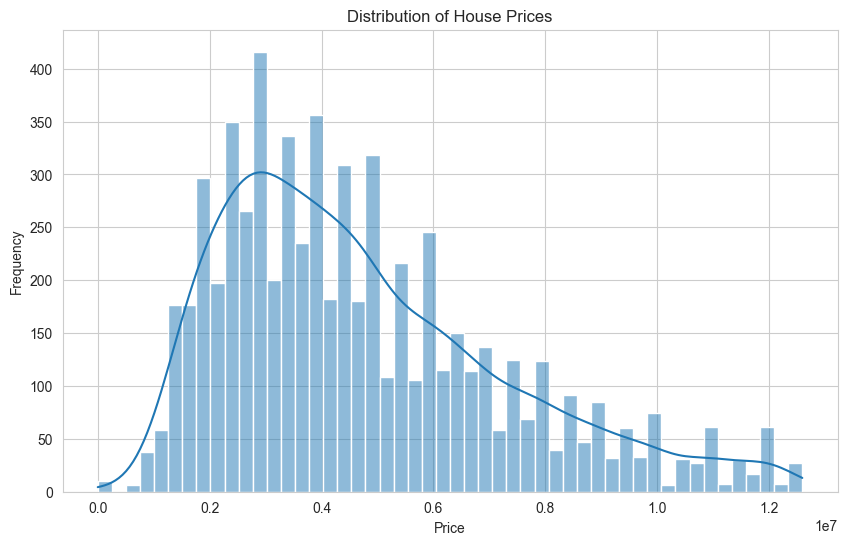

In [31]:
# Distribution of House Prices
plt.figure(figsize=(10, 6))
sns.histplot(housing['Price'], bins=50, kde=True)
plt.title('Distribution of House Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

We observe that the most frequent price range is between 2 and 6 million kroners.

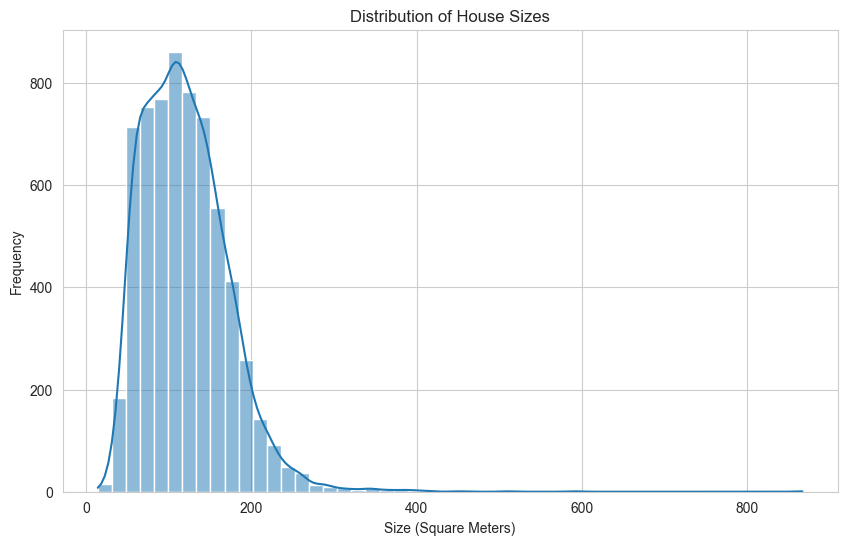

In [32]:
# Distribution of House Sizes
plt.figure(figsize=(10, 6))
sns.histplot(housing['Size'], bins=50, kde=True)
plt.title('Distribution of House Sizes')
plt.xlabel('Size (Square Meters)')
plt.ylabel('Frequency')
plt.show()

We observe that most frequent size of a residence is around 160 m^2.

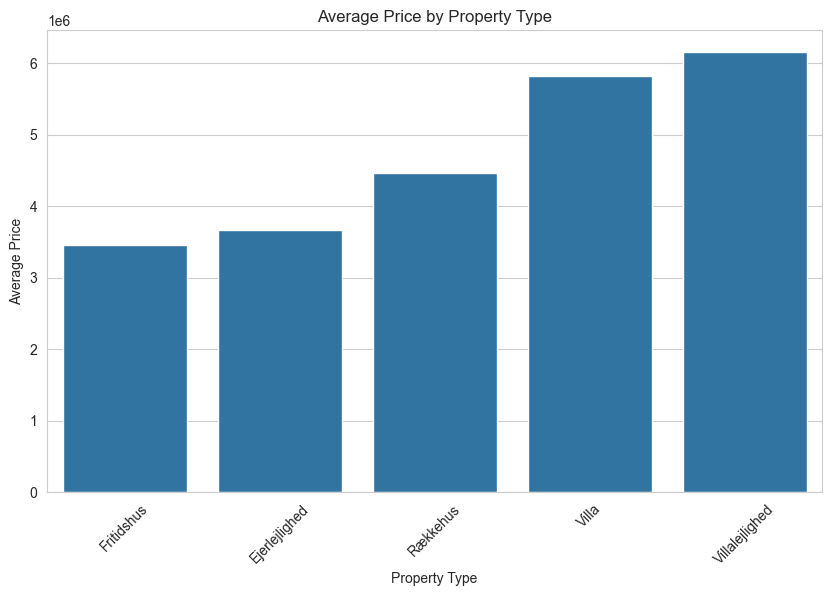

In [33]:
average_price_by_type = housing.groupby('Type')['Price'].mean().sort_values()
plt.figure(figsize=(10, 6))
sns.barplot(x=average_price_by_type.index, y=average_price_by_type.values, ci=None)
plt.title('Average Price by Property Type')
plt.xlabel('Property Type')
plt.ylabel('Average Price')
plt.xticks(rotation=45)
plt.show()

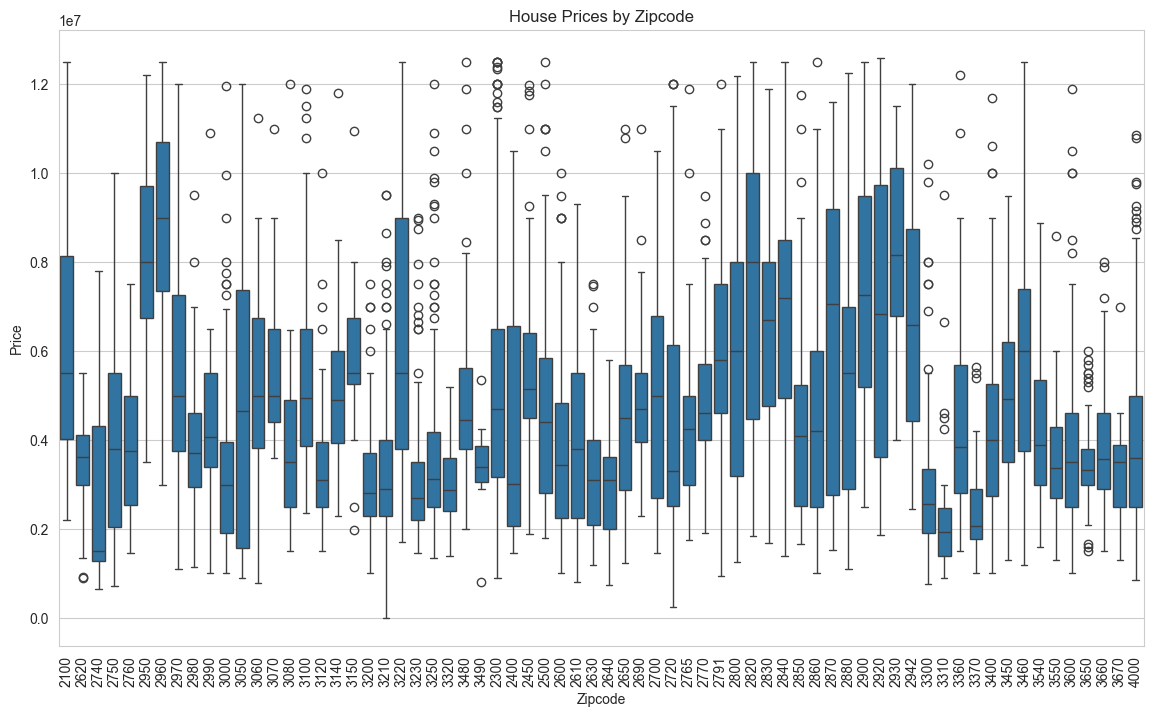

In [34]:
# Box plot for house prices by zipcode
plt.figure(figsize=(14, 8))
sns.boxplot(data=housing, x='Zipcode', y='Price')
plt.xticks(rotation=90)
plt.title('House Prices by Zipcode')
plt.show()

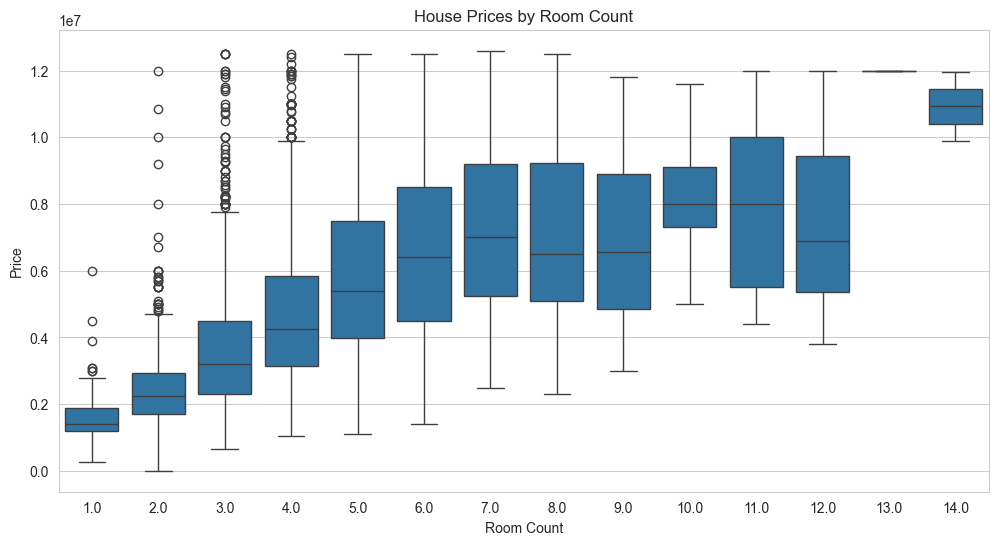

In [35]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=housing, x='Room count', y='Price')
plt.title('House Prices by Room Count')
plt.xlabel('Room Count')
plt.ylabel('Price')
plt.show()

In [36]:
high_room_count_houses = housing[housing['Room count'] == 3]
high_room_count_houses.sort_values(by='Price', ascending=False)

,Address,Longitude,Latitude,Price,Type,Room count,Construction year,Risk of burglary,Distance to pharmacy,Distance to daycare,Distance to grocery store,Size,Squaremeter price,Energy class,Zipcode
2373,Marsalavej 27,55.653756,12.628393,12500000,Villa,3.0,1923.000000,mellem,527.0,236,562.000,149,83892,D,2300
1834,Julsgårdsvej 16,56.058260,12.072478,12500000,Fritidshus,3.0,1942.000000,mellem,611.0,1628,4.290,50,250000,C,3220
4653,Brogårdsvej 43,55.753928,12.534752,12495000,Villa,3.0,1915.000000,høj,813.0,158,843.000,189,66111,C,2820
212,"Scherfigsvej 6A, 4. tv",55.721474,12.579764,12495000,Ejerlejlighed,3.0,1919.880952,lav,499.0,522,162.000,129,96860,A2010,2100
5364,"Torkel Badens Vej 8, 1.",55.729999,12.560483,11995000,Villalejlighed,3.0,1925.000000,mellem,991.0,199,484.000,105,114238,E,2900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2332,Hornbækvej 125,55.989428,12.495239,800000,Fritidshus,3.0,1982.000000,mellem,611.0,528,3.254,50,16000,C,3490
397,Solsikkevænget 35,55.718178,12.342762,710000,Fritidshus,3.0,1954.000000,lav,536.5,580,922.000,50,14200,D,2750
279,Ceresvej 1,55.705003,12.379730,695000,Fritidshus,3.0,1976.016129,lav,829.0,1176,1.980,450,1544,C,2740
289,Jættevej 6,55.700101,12.384053,648000,Fritidshus,3.0,1976.016129,lav,829.0,1418,1.542,49,13224,C,2740


We observe a general trend that indicates an increase in the number of rooms per residence is associated with higher prices. However, there are some residences with e.g. 3 rooms that have exceptionally high prices. These outliers are primarily located in Copenhagen, particularly near the Amager area, which makes sense.

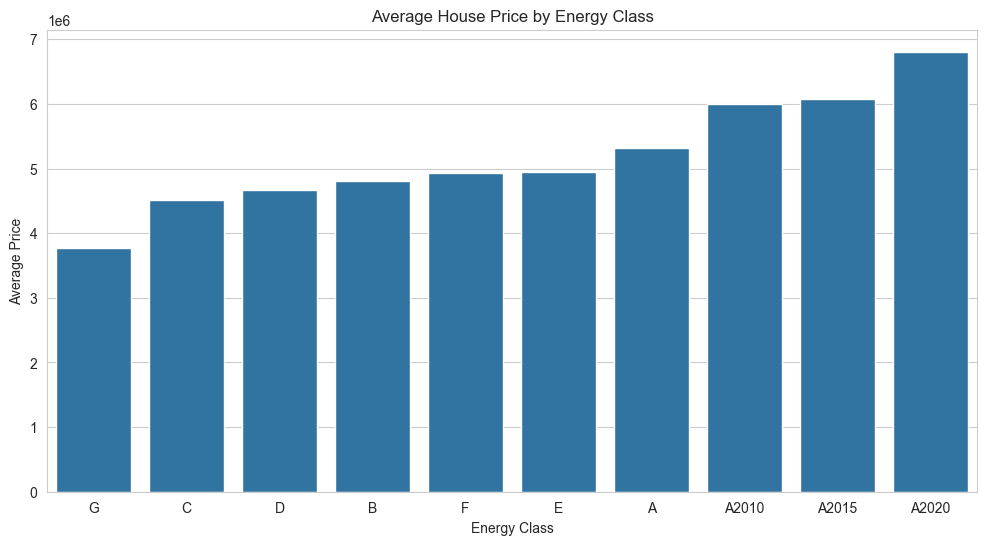

In [37]:
average_price_by_energy_class = housing.groupby('Energy class')['Price'].mean().sort_values()
plt.figure(figsize=(12, 6))
sns.barplot(x=average_price_by_energy_class.index, y=average_price_by_energy_class.values, ci=None)
plt.title('Average House Price by Energy Class')
plt.xlabel('Energy Class')
plt.ylabel('Average Price')
plt.show()

In [38]:
housing["Energy class"].value_counts()

Energy class
C        2657
D        1902
E         525
B         458
A         263
F         186
A2010     164
A2015     118
G          84
A2020      53
Name: count, dtype: int64

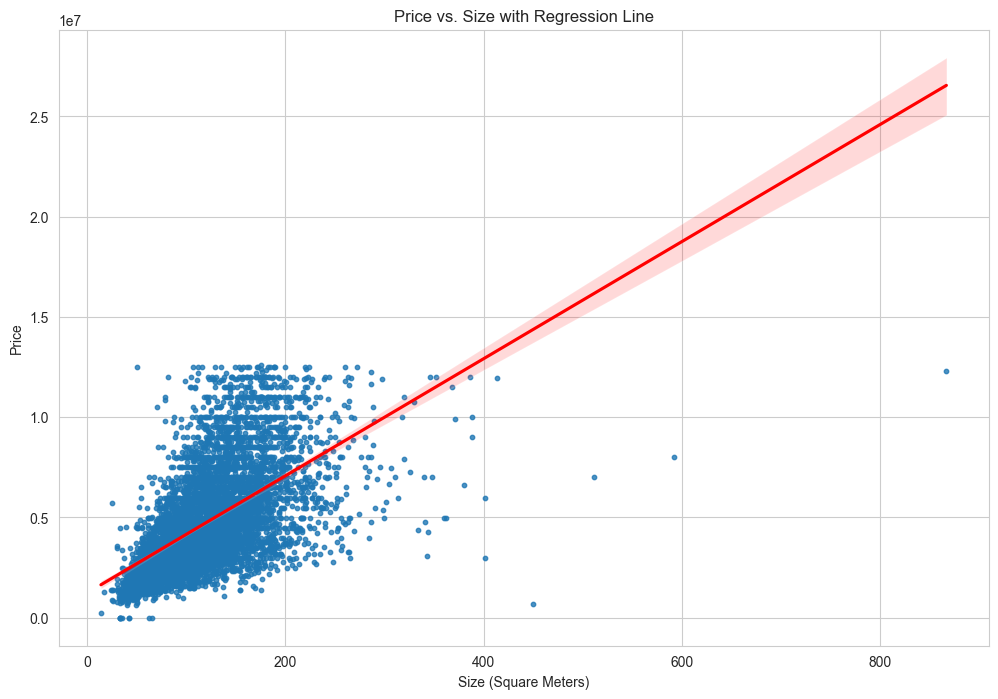

In [39]:
# Scatter plot with regression line
plt.figure(figsize=(12, 8))
sns.regplot(x='Size', y='Price', data=housing, scatter_kws={'s':10}, line_kws={'color':'red'})
plt.title('Price vs. Size with Regression Line')
plt.xlabel('Size (Square Meters)')
plt.ylabel('Price')
plt.show()

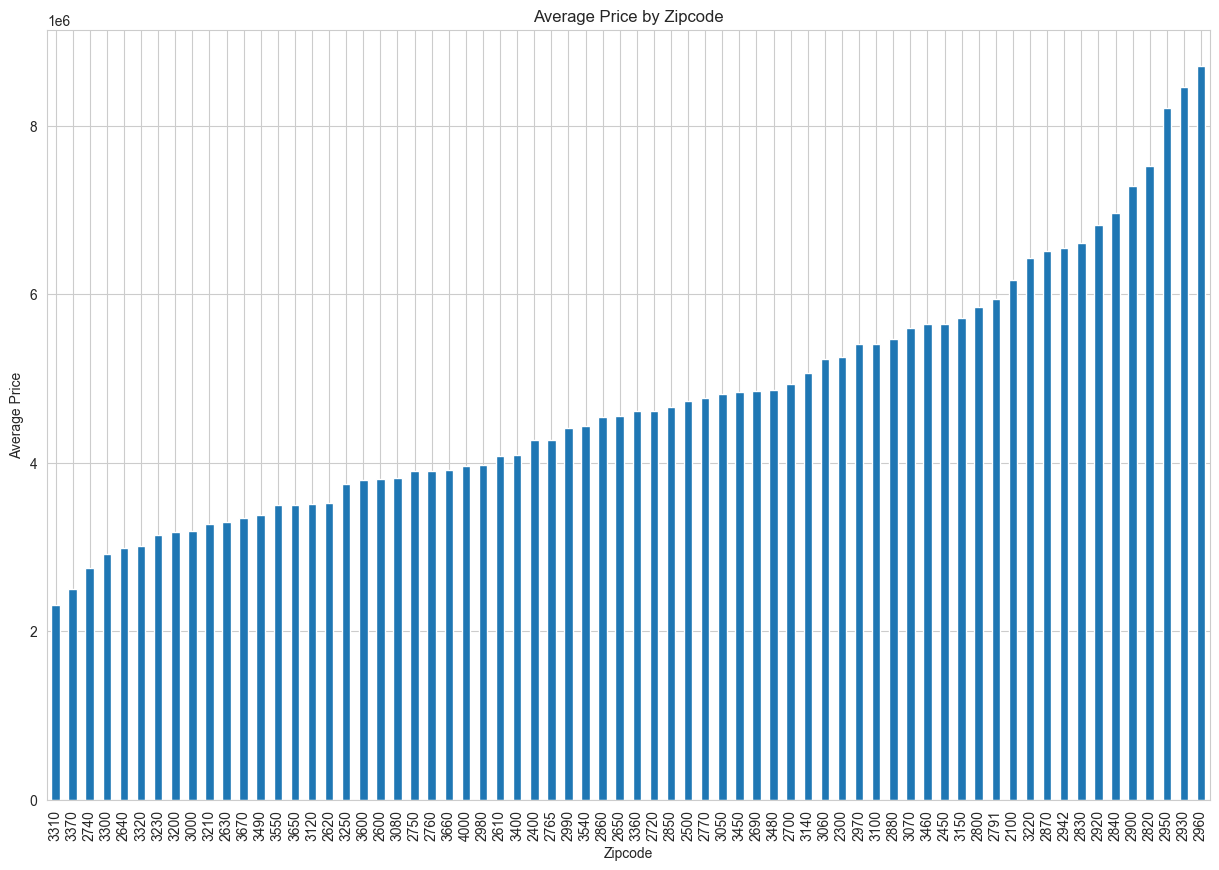

In [40]:
# Bar plot of average price by zipcode
plt.figure(figsize=(15, 10))
avg_price_by_zipcode = housing.groupby('Zipcode')['Price'].mean().sort_values()
avg_price_by_zipcode.plot(kind='bar')
plt.title('Average Price by Zipcode')
plt.xlabel('Zipcode')
plt.ylabel('Average Price')
plt.show()

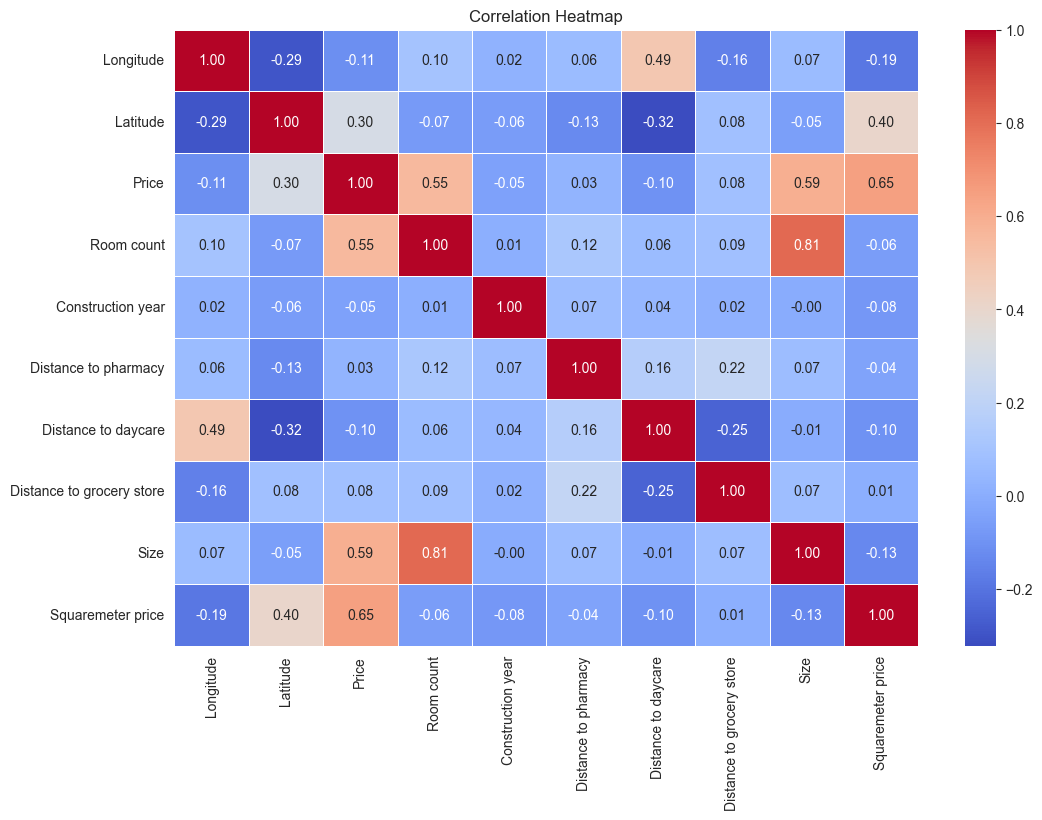

In [41]:
numeric_columns = housing.select_dtypes(include=['int64', 'float64'])
plt.figure(figsize=(12, 8))
corr = numeric_columns.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

The correlation heatmap visually represents the relationships between different numerical features in our dataset using colors. The intensity of colors in the heatmap indicates the strength and direction of the correlation between pairs of features. Darker shades (e.g., dark blue) indicate strong negative correlation, meaning that as one feature increases, the other tends to decrease. Lighter shades (e.g., light yellow) indicate strong positive correlation, meaning that as one feature increases, the other tends to increase as well. Near-white colors (e.g., white) indicate little to no correlation between features.

The diagonal line from the top left to the bottom right of the heatmap represents the correlation of each feature with itself, which is always perfect correlation (1.0).

The numbers in each cell of the heatmap represent the correlation coefficient between the corresponding pair of features. This coefficient ranges from -1 to 1, where:
- -1 indicates perfect negative correlation,
- 0 indicates no correlation, and
- 1 indicates perfect positive correlation.

By examining the correlation heatmap, we can identify which features are positively or negatively correlated with each other.

We observe that:
- price and size have strong positive correlation, indicating that larger houses tend to be more expensive.
- room count and size also show strong positive correlation, as expected, since larger houses generally have more rooms.

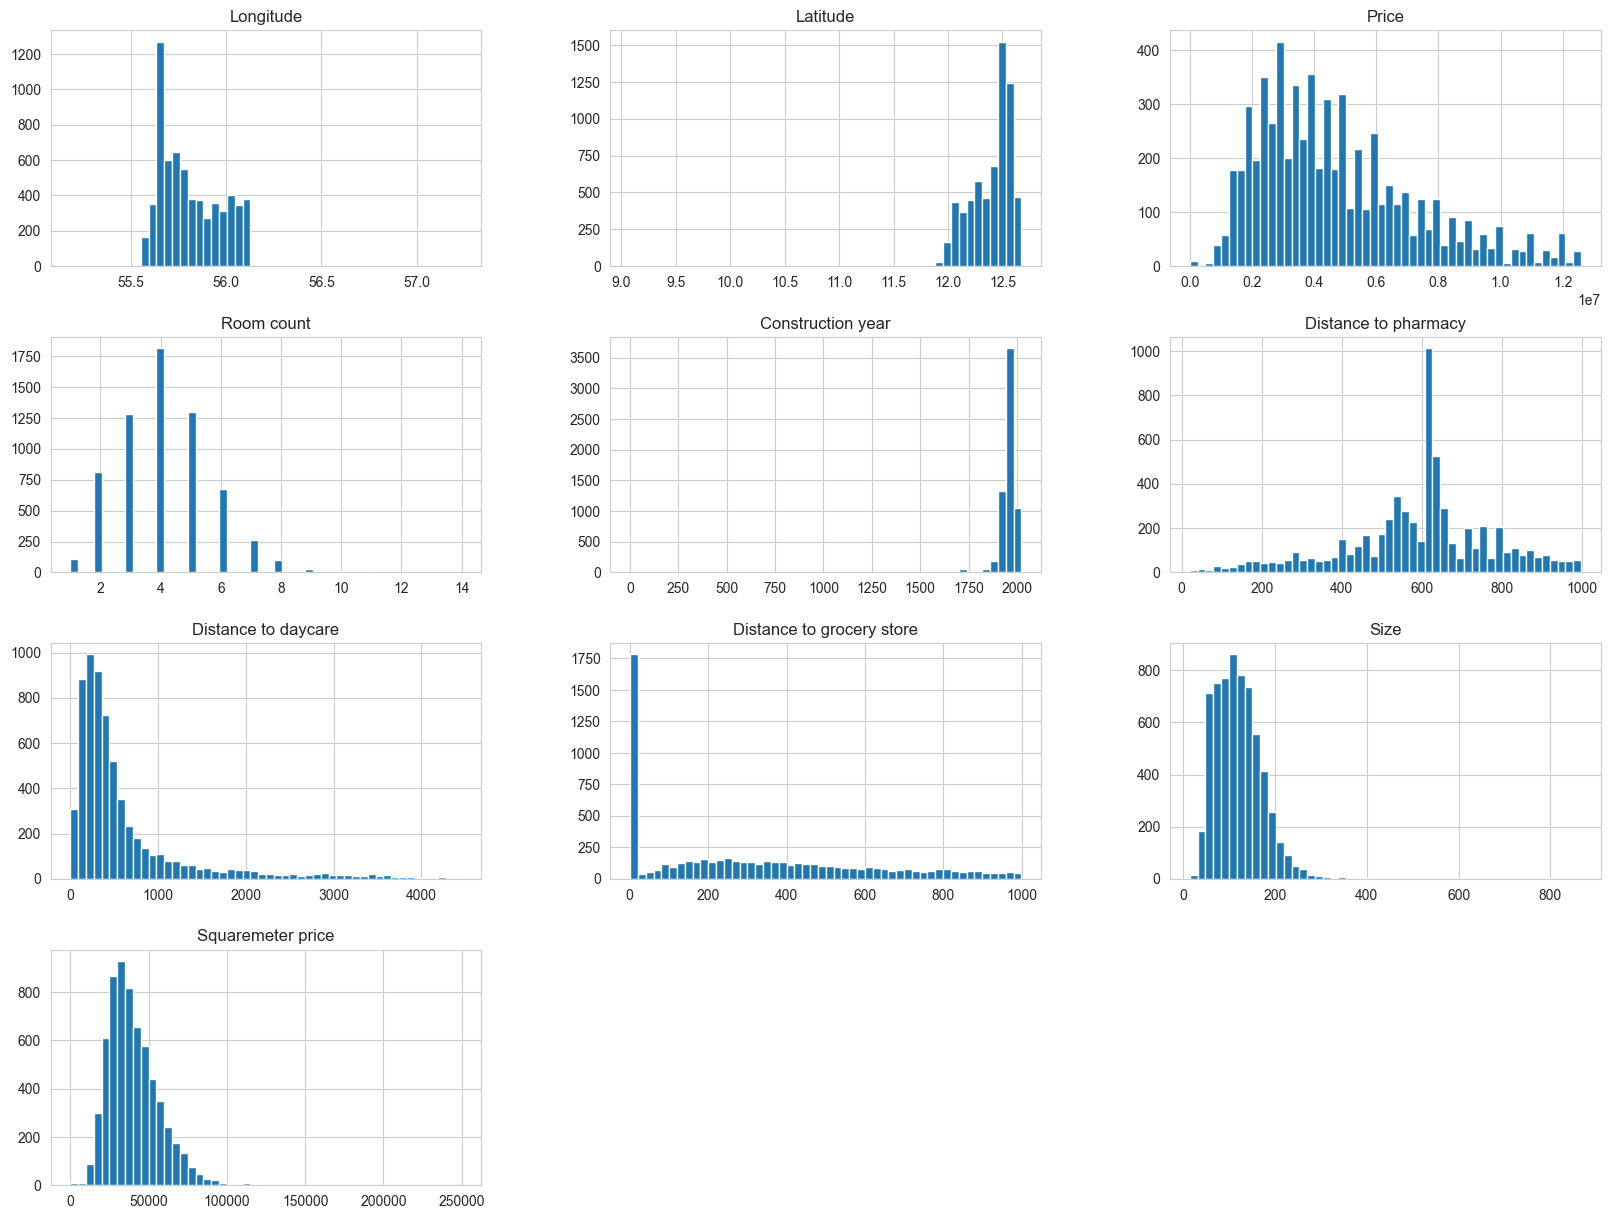

In [42]:
housing.hist(bins=50, figsize=(20, 15))
plt.show()

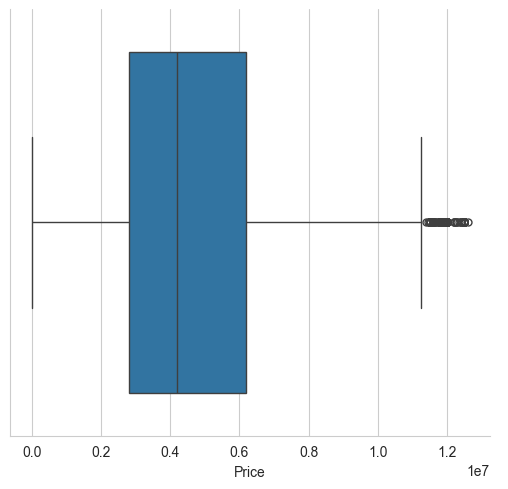

In [43]:
sns.catplot(data=housing, x="Price", kind="box")

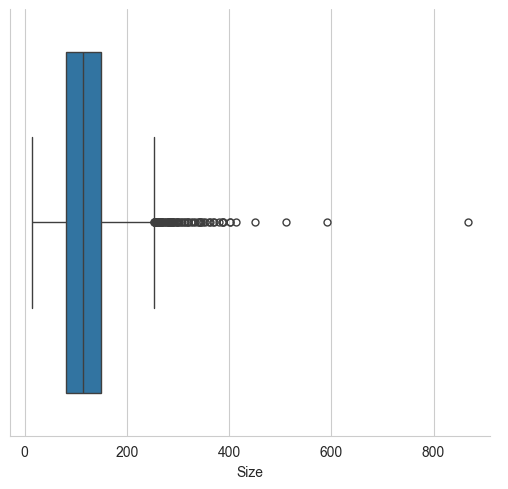

In [44]:
sns.catplot(data=housing, x="Size", kind="box")

We observe some outliers. Lets check them out.

In [45]:
housing_sizes = housing[housing['Size'] > 350]

These are valid residences, though with "grundareal" as their sizes.. We decide to remove them for now and see how it affects our ML scores.

In [46]:
housing = housing[housing['Size'] <= 350]

A geographical scatterplot of the data

<Axes: xlabel='Latitude', ylabel='Longitude'>

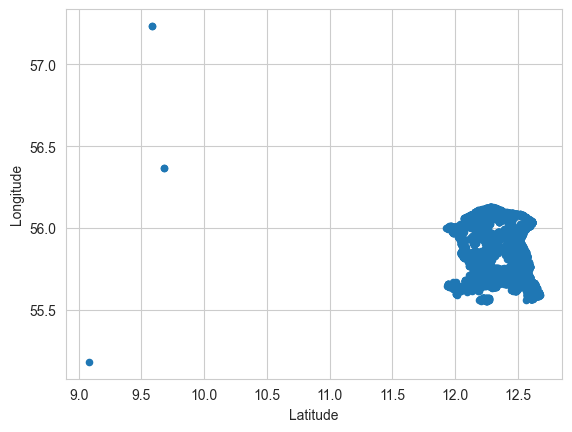

In [47]:
housing.plot(kind="scatter", x="Latitude", y="Longitude")

This looks like Zealand on the right and some wrongly scraped houses from Jylland. Let us find out!

In [48]:
houses_with_low_latitude = housing[housing['Latitude'] < 10]
houses_with_low_latitude

,Address,Longitude,Latitude,Price,Type,Room count,Construction year,Risk of burglary,Distance to pharmacy,Distance to daycare,Distance to grocery store,Size,Squaremeter price,Energy class,Zipcode
1052,"Chr Rasmussens Vej 22, st. th",57.235624,9.586116,1895000,Ejerlejlighed,3.0,1953.0,lav,996.0,450,643.0,76,24934,E,3000
1056,Chr Rasmussens Vej 10,57.235624,9.586116,3495000,Villa,4.0,1936.0,lav,544.0,505,685.0,101,34603,C,3000
3281,"Damparken 36, 2. tv",55.182104,9.080482,2195000,Ejerlejlighed,2.0,1939.0,høj,657.0,172,169.0,57,38508,C,2610
4288,Hf. Sønderbro 22,56.368960,9.681442,949000,Fritidshus,2.0,1972.0,lav,713.0,993,888.0,42,22595,C,2791
4362,Hf. Sønderbro 9,56.370153,9.681480,1345000,Fritidshus,3.0,1973.0,lav,713.0,977,895.0,40,33625,C,2791


Our observations are correct. It seems that the Nominatim library misunderstood the address and fetched the wrong Longitudes and Latitudes. Let us quickly fix those.

For now I will simply remove these from the housing dataframe...

In [49]:
housing = housing[housing['Latitude'] >= 10]
housing.shape

(6389, 15)

<Axes: xlabel='Latitude', ylabel='Longitude'>

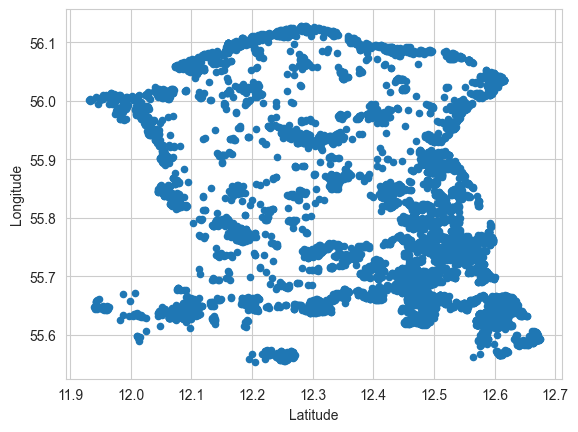

In [50]:
housing.plot(kind="scatter", x="Latitude", y="Longitude")

This looks much better --> Zealand.

<Axes: xlabel='Latitude', ylabel='Longitude'>

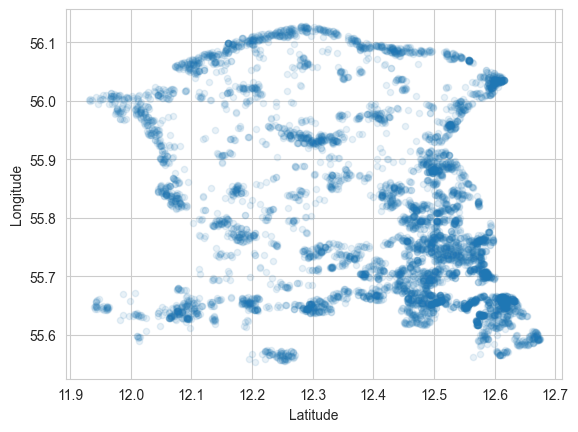

In [51]:
housing.plot(kind="scatter", x="Latitude", y="Longitude", alpha=0.1)

The bigger the circle, higher the price. Also displaying square meter price based on colors.

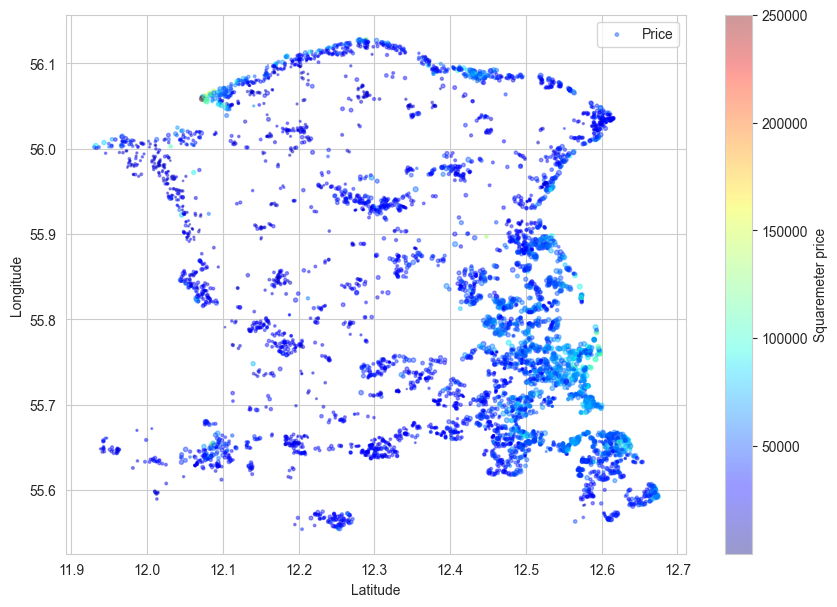

In [52]:
housing.plot(kind="scatter", x="Latitude", y="Longitude", alpha=0.4, s=housing["Price"]/1000000, label="Price", figsize=(10,7), c="Squaremeter price", cmap=plt.get_cmap("jet"), colorbar=True,)
plt.legend()

As seen in the above plots, we can see that we are in Northern Zealand, starting from Helsingør in to top corner and going down to Lyngby area. We get an overview over the house locations and prices in the region. We also get an indication of the squaremeter prices where we see where the outliers mentioned earlier are located with a more reddish color. It is also interesting to see that the higher priced houses are located near the ocean near Vedbæk, Charlottenlund, Hellerup - not so surprising after all.

# Machine Learning Models

Before chosing a model we need to do feature selection.

It is a typical supervised learning task, since we have labeled training examples (each instance comes with the expected output). It is also a typical regression task, since we want to predict a value, that is the house price. More specifically, this is a multiple regression problem, since the system will use multiple features to make a prediction.

We would like to use the following features in our models:

- **Longitude** and **Latitude**: These are crucial for location-based valuation. Houses in different locations will have different prices.
- **Type**: Different types of houses (e.g., apartment, detached house) have different price ranges.
- **Room count**: The number of rooms can significantly impact the price.
- **Construction year**: Older houses might have different values compared to newer ones.
- **Risk of burglary**: Safety of the area can affect property prices.
- **Distance to pharmacy**: Proximity to amenities can impact house prices.
- **Distance to daycare**: Proximity to daycare facilities can be important for families with children.
- **Distance to grocery store**: Convenience of shopping can influence house prices.
- **Size**: The size of the house is a direct factor in its valuation.
- **Energy class**: More energy-efficient houses might be valued higher.
- **Zipcode**: This can capture location-specific factors that longitude and latitude alone might miss (such as school districts, local taxes, etc.).

Excluded Feature
- Squaremeter price: This is directly related to the price and would cause the model to trivially predict the price, introducing a flaw.

Preprocessing and Encoding
- Label Encoding for ordinal features (Risk of burglary, Energy class).
- One-Hot Encoding for nominal features (Type).

Model Training
We will use several models and evaluate their performance to choose the best one. These models include:

- Random Forest Regressor
- Gradient Boosting Regressor

In [53]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, VotingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
import joblib

We start by dropping the Squaremeter price column, which is not needed for model training, for obvious reasons.

In [54]:
housing.drop(columns=['Squaremeter price'], inplace=True)

Handling missing values if any exist - shouldn't be the case

In [55]:
housing.fillna(housing.mean(numeric_only=True), inplace=True)

In [56]:
housing.shape

(6389, 14)

We perform label encoding for ordinal features and one-hot encoding for nominal features.

In [57]:
# Label Encoding for ordinal features
label_encoders = {}
ordinal_features = ['Risk of burglary', 'Energy class', 'Type']
for feature in ordinal_features:
    le = LabelEncoder()
    housing[feature] = le.fit_transform(housing[feature])
    label_encoders[feature] = le

In [58]:
# One-Hot Encoding for nominal features
nominal_features = ['Zipcode']
housing = pd.get_dummies(housing, columns=nominal_features)

We define X as the features and y as the target variable (Price).

In [59]:
X = housing.drop(columns=['Address', 'Price'])
y = housing['Price']

We create a preprocessing pipeline to scale numerical features.

In [60]:
# List of numerical columns that will be scaled
numerical_columns = X.select_dtypes(include=['float64', 'int64']).columns.tolist()

# Preprocessing pipeline for numeric data
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

# Preprocessor with ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numerical_columns)
    ], remainder='passthrough')

Model Initialization and Hyperparameter Tuning. We initialize various regression models and define hyperparameter grids for Random Forest and Gradient Boosting.

In [61]:
# Models initialization with hyperparameters tuning
param_grids = {
    'Random Forest': {
        'model__n_estimators': [100, 200, 500],
        'model__max_depth': [None, 10, 20]
    },
    'Gradient Boosting': {
        'model__n_estimators': [100, 200, 500],
        'model__learning_rate': [0.05, 0.1, 0.2],
        'model__max_depth': [3, 5, 7]
    }
}

# Dictionary to store the best models
best_models = {}

# Dictionary of models to be trained
models = {
    'Linear Regression': LinearRegression(),
    'Ridge': Ridge(),
    'Lasso': Lasso(),
    'Decision Tree': DecisionTreeRegressor(),
    'Random Forest': RandomForestRegressor(random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(random_state=42)
}

Splitting the data into training (80%) and testing (20%) sets to evaluate model performance.

In [62]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

We train each model using a pipeline that includes preprocessing and the model itself. For models with hyperparameter grids, we perform grid search to find the best parameters.

In [63]:
# Train models and perform grid search for models with hyperparameter grids
for model_name, model in models.items():
    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('model', model)
    ])
    
    if model_name in param_grids:
        grid_search = GridSearchCV(pipeline, param_grids[model_name], cv=5, scoring='neg_mean_absolute_error')
        grid_search.fit(X_train, y_train)
        best_models[model_name] = grid_search.best_estimator_
        print(f'Best parameters for {model_name}: {grid_search.best_params_}')
    else:
        pipeline.fit(X_train, y_train)
        best_models[model_name] = pipeline

Best parameters for Random Forest: {'model__max_depth': None, 'model__n_estimators': 200}
Best parameters for Gradient Boosting: {'model__learning_rate': 0.05, 'model__max_depth': 7, 'model__n_estimators': 500}


We evaluate each model on the test set and print the evaluation metrics.

In [64]:
# Evaluate the models
for model_name, model in best_models.items():
    y_pred = model.predict(X_test)
    print(f'{model_name}:')
    print(f'MAE: {mean_absolute_error(y_test, y_pred)}')
    print(f'MSE: {mean_squared_error(y_test, y_pred)}')
    print(f'R-squared: {r2_score(y_test, y_pred)}')
    print('')

Linear Regression:
MAE: 1027384.5860719875
MSE: 2058003286988.9084
R-squared: 0.6856844606568606

Ridge:
MAE: 1026047.5516963599
MSE: 2058446701547.726
R-squared: 0.6856167386628831

Lasso:
MAE: 1027366.8046321645
MSE: 2058002965808.153
R-squared: 0.6856845097102819

Decision Tree:
MAE: 1095831.3526343245
MSE: 2645314065868.1113
R-squared: 0.5959854279135515

Random Forest:
MAE: 772812.7979801028
MSE: 1288605175497.987
R-squared: 0.8031933994966484

Gradient Boosting:
MAE: 731112.6656269829
MSE: 1122300531497.8132
R-squared: 0.8285928408895061



We create a Voting Regressor that combines the best Random Forest, Gradient Boosting, and Linear Regression models to improve overall performance. The Voting Regressor takes the average of the predictions from each model to produce a final prediction.

In [65]:
# Model Ensemble using Voting Regressor
voting_regressor = VotingRegressor(estimators=[
    ('rf', best_models['Random Forest']),
    ('gb', best_models['Gradient Boosting']),
    ('lr', best_models['Linear Regression'])
])

voting_regressor.fit(X_train, y_train)
y_pred = voting_regressor.predict(X_test)

# Evaluate the ensemble model using the same metrics as with the individual models
print('Voting Regressor:')
print(f'MAE: {mean_absolute_error(y_test, y_pred)}')
print(f'MSE: {mean_squared_error(y_test, y_pred)}')
print(f'R-squared: {r2_score(y_test, y_pred)}')

Voting Regressor:
MAE: 768311.8763543646
MSE: 1226550508319.6736
R-squared: 0.812670909229613


In [66]:
best_performing_model_name = max(best_models, key=lambda name: r2_score(y_test, best_models[name].predict(X_test)))
best_performing_model_name

'Gradient Boosting'

In [67]:
best_performing_model = best_models[best_performing_model_name]
joblib.dump(best_performing_model, f'../models/best_performing_model')

['../models/best_performing_model']

## Predicting price for a real house

In [77]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

new_house = {
    'Longitude': 56.04058189,  
    'Latitude': 12.57388246,
    'Type': 'Villa',
    'Room count': 6,
    'Construction year': 1952,
    'Risk of burglary': 'mellem',
    'Distance to pharmacy': 880,
    'Distance to daycare': 549,
    'Distance to grocery store': 405,
    'Size': 112,
    'Energy class': 'E',
    'Zipcode': '3000'
}

# Converting the new house data to a DataFrame
new_house_df = pd.DataFrame([new_house])

# Applying label encoding to ordinal features
for feature in ordinal_features:
    le = label_encoders[feature]
    new_house_df[feature] = le.transform(new_house_df[feature])

# Applying one-hot encoding to nominal features
new_house_df = pd.get_dummies(new_house_df, columns=nominal_features)

# Ensuring the new house DataFrame has all the necessary columns
missing_cols = set(X.columns) - set(new_house_df.columns)
for col in missing_cols:
    new_house_df[col] = 0

new_house_df = new_house_df[X.columns]  # Reordering columns to match training data

# Scaling the numerical features using the same preprocessor
new_house_preprocessed = pd.DataFrame(preprocessor.transform(new_house_df), columns=new_house_df.columns)

predicted_price = best_performing_model.predict(new_house_preprocessed)
print(f'Predicted Price for the new house: {predicted_price[0]}')

Predicted Price for the new house: 2377402.6526360265
